In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
import math
import seaborn as sns

In [ ]:
## Get current working directory
print(os.getcwd())

In [2]:
## Importing data
long_data = pd.read_csv('ProjectB_v2.txt')
long_data['TradeDate'] = pd.to_datetime(long_data['TradeDate'], format='%m/%d/%Y')
print(long_data.head())
print(long_data.tail())

   TradeDate                    d         r      ticker  project_flag     id
0 1990-01-02  1990-01-02 00:00:00  0.002981  AYE                    1  10137
1 1990-01-02  1990-01-02 00:00:00  0.019181  FO                     1  10225
2 1990-01-02  1990-01-02 00:00:00  0.021740  T                      1  10401
3 1990-01-02  1990-01-02 00:00:00  0.000000  ALGI                   1  10488
4 1990-01-02  1990-01-02 00:00:00 -0.005420  ADM                    1  10516
         TradeDate                    d         r      ticker  project_flag  \
1744315 1999-12-31  1999-12-31 00:00:00  0.003893  WL                     1   
1744316 1999-12-31  1999-12-31 00:00:00 -0.022931  WLHN                   1   
1744317 1999-12-31  1999-12-31 00:00:00 -0.031749  WDHD                   1   
1744318 1999-12-31  1999-12-31 00:00:00  0.054277  WOR                    1   
1744319 1999-12-31  1999-12-31 00:00:00  0.009549  ZION                   1   

            id  
1744315  83030  
1744316  83396  
1744317  834

In [3]:
long_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1744320 entries, 0 to 1744319
Data columns (total 6 columns):
TradeDate       datetime64[ns]
d               object
r               float64
ticker          object
project_flag    int64
id              int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 79.8+ MB


In [4]:
long_data.describe()

,r,project_flag,id
count,1.744320e+06,1744320.0,1.744320e+06
mean,3.665415e-04,1.0,4.074438e+04
std,2.673992e-02,0.0,1.870248e+04
min,-1.011602e+00,1.0,1.013700e+04
25%,-1.025642e-02,1.0,2.397500e+04
50%,0.000000e+00,1.0,4.083850e+04
75%,1.052640e-02,1.0,5.622300e+04
max,1.412270e+00,1.0,8.412900e+04


In [5]:
### Converting it to wide data
wide_data = pd.pivot_table(long_data, index='TradeDate', columns='id', values='r')
### Converting log return to normal return
wide_data = wide_data.applymap(lambda x: math.exp(x) -1)
wide_data.head()

id,10137,10225,10401,10488,10516,10656,10866,10890,11308,11404,...,81294,81614,81700,81702,82107,83030,83396,83433,83601,84129
TradeDate,,,,,,,,,,,,,,,,,,,,,
1990-01-02,0.002985,0.019366,0.021978,0.000000,-0.005405,0.016949,0.023041,0.059322,0.009709,0.004292,...,0.007634,0.012821,-0.032258,0.029197,-0.005376,0.013245,0.000000,0.032787,-0.005435,0.009009
1990-01-03,-0.002976,0.000000,-0.008065,-0.170732,0.000000,-0.050000,0.045045,-0.024000,-0.014423,-0.017094,...,0.000000,0.012658,0.000000,0.007092,0.000000,0.013072,0.045455,-0.031746,0.010929,0.017857
1990-01-04,-0.002985,-0.022453,-0.016260,0.235294,-0.005435,0.052632,-0.017241,0.008197,-0.004878,-0.017391,...,0.013030,-0.020000,0.016667,0.021127,0.010811,0.012903,-0.014493,0.000000,0.000000,0.000000
1990-01-05,-0.008982,-0.005300,-0.016529,-0.047619,-0.043716,-0.050000,-0.004386,0.024390,-0.008170,-0.008850,...,0.000000,-0.025641,0.000000,-0.006897,0.000000,-0.012739,-0.014706,0.000000,0.000000,0.017544
1990-01-08,-0.012085,-0.023091,0.025210,0.100000,0.011429,0.052632,0.008811,-0.031746,0.021417,-0.017857,...,-0.007576,0.000000,-0.049180,-0.006944,0.000000,0.000000,0.007463,-0.016393,0.000000,-0.017241


In [6]:
wide_data.loc['1990-01-15'].value_counts()

 0.000000    148
-0.010417      5
-0.021277      5
-0.019608      5
-0.032787      4
-0.008929      4
-0.011111      4
-0.034483      4
-0.015625      4
-0.016260      3
-0.009009      3
-0.010309      3
-0.028986      3
-0.017544      3
-0.018182      3
-0.033333      3
-0.027027      3
-0.024691      3
-0.010753      3
 0.007246      3
-0.015873      3
 0.017544      3
-0.016575      3
-0.022222      3
-0.025641      2
-0.020478      2
-0.031579      2
-0.021583      2
 0.007937      2
 0.010638      2
            ... 
-0.020661      1
-0.009524      1
 0.020305      1
-0.009662      1
-0.003704      1
-0.006742      1
-0.053892      1
-0.009901      1
 0.026738      1
-0.006135      1
-0.006897      1
-0.016043      1
-0.007143      1
 0.002976      1
 0.014388      1
-0.020619      1
-0.016667      1
-0.013636      1
-0.017045      1
-0.024000      1
-0.012146      1
-0.007067      1
-0.037037      1
-0.019943      1
-0.005071      1
-0.010782      1
-0.023669      1
-0.011194     

In [7]:
### Finding number of dates and securities
print('Number of business days ' + str(len(wide_data.index)))
print('Number of repetitions in dates ' + str(len(wide_data.index) - len(wide_data.index.unique())))
print('Number of ids ' + str(len(wide_data.columns)))
print('Number of repetitions in ids ' + str(len(wide_data.index) - len(wide_data.index.unique())))
print('Number of NAs in data ' + str(wide_data.isna().sum().sum()))

Number of business days 2528
Number of repetitions in dates 0
Number of ids 690
Number of repetitions in ids 0
Number of NAs in data 0


In [8]:
### Creating market return 
Market_return = wide_data.mean(axis=1)
Market_return[:5]

TradeDate
1990-01-02    0.011522
1990-01-03    0.001723
1990-01-04   -0.002926
1990-01-05   -0.003661
1990-01-08    0.001308
dtype: float64

### Strategy parameters
The strategy goes long the top quintiles and short the bottom quintiles

In [9]:
### Creating signal matrix
signal = - wide_data.sub(Market_return, axis='index')
signal.head()

id,10137,10225,10401,10488,10516,10656,10866,10890,11308,11404,...,81294,81614,81700,81702,82107,83030,83396,83433,83601,84129
TradeDate,,,,,,,,,,,,,,,,,,,,,
1990-01-02,0.008537,-0.007844,-0.010456,0.011522,0.016927,-0.005427,-0.011519,-0.047800,0.001813,0.007230,...,0.003888,-0.001299,0.043780,-0.017675,0.016898,-0.001723,0.011522,-0.021265,0.016957,0.002513
1990-01-03,0.004699,0.001723,0.009788,0.172455,0.001723,0.051723,-0.043322,0.025723,0.016146,0.018817,...,0.001723,-0.010935,0.001723,-0.005369,0.001723,-0.011349,-0.043732,0.033469,-0.009206,-0.016134
1990-01-04,0.000059,0.019527,0.013334,-0.238220,0.002509,-0.055558,0.014315,-0.011123,0.001952,0.014465,...,-0.015956,0.017074,-0.019593,-0.024053,-0.013737,-0.015829,0.011567,-0.002926,-0.002926,-0.002926
1990-01-05,0.005321,0.001639,0.012868,0.043958,0.040055,0.046339,0.000725,-0.028051,0.004509,0.005189,...,-0.003661,0.021980,-0.003661,0.003236,-0.003661,0.009078,0.011045,-0.003661,-0.003661,-0.021205
1990-01-08,0.013393,0.024399,-0.023902,-0.098692,-0.010121,-0.051324,-0.007503,0.033054,-0.020109,0.019165,...,0.008884,0.001308,0.050488,0.008252,0.001308,0.001308,-0.006155,0.017701,0.001308,0.018549


In [10]:
### Dividing each row into quantiles
signal_q = signal.copy().apply(lambda row: pd.qcut(row, 5, labels=False, duplicates = 'drop') , axis=1)
signal_q.head()

id,10137,10225,10401,10488,10516,10656,10866,10890,11308,11404,...,81294,81614,81700,81702,82107,83030,83396,83433,83601,84129
TradeDate,,,,,,,,,,,,,,,,,,,,,
1990-01-02,3,1,1,3,4,1,1,0,2,2,...,2,2,4,0,4,2,3,0,4,2
1990-01-03,3,2,3,4,2,4,0,4,4,4,...,2,1,2,1,2,1,0,4,1,0
1990-01-04,2,4,3,0,2,0,4,0,2,4,...,0,4,0,0,0,0,3,1,1,1
1990-01-05,3,2,4,4,4,4,2,0,3,3,...,1,4,1,2,1,3,3,1,1,0
1990-01-08,4,4,0,0,1,0,1,4,0,4,...,3,2,4,3,2,2,1,4,2,4


In [11]:
### Some of the dates have many zeros which messes up bucketing in quantiles. So, need to 
def positioning(x):
    max_val = x.max()
    min_val = x.min()
    
    other_values = list(set(x.unique()) - set([max_val, min_val]))
    x.replace(min_val, -1, inplace=True)
    x.replace(other_values , 0, inplace=True)
    x.replace(max_val, 1, inplace=True)
    return x

In [12]:
positions = signal_q.copy().apply(lambda row: positioning(row), axis=1)
positions.head()

id,10137,10225,10401,10488,10516,10656,10866,10890,11308,11404,...,81294,81614,81700,81702,82107,83030,83396,83433,83601,84129
TradeDate,,,,,,,,,,,,,,,,,,,,,
1990-01-02,0,0,0,0,1,0,0,-1,0,0,...,0,0,1,-1,1,0,0,-1,1,0
1990-01-03,0,0,0,1,0,1,-1,1,1,1,...,0,0,0,0,0,0,-1,1,0,-1
1990-01-04,0,1,0,-1,0,-1,1,-1,0,1,...,-1,1,-1,-1,-1,-1,0,0,0,0
1990-01-05,0,0,1,1,1,1,0,-1,0,0,...,0,1,0,0,0,0,0,0,0,-1
1990-01-08,1,1,-1,-1,0,-1,0,1,-1,1,...,0,0,1,0,0,0,0,1,0,1


In [13]:
### Sanity Checks for positions matrix
positions.loc['1990-01-15'].value_counts()

 0    283
-1    269
 1    138
Name: 1990-01-15 00:00:00, dtype: int64

In [14]:
### Creating weighting function
def weighting(x):
    long_position = x[x==1].sum()
    short_position = abs(x[x==-1]).sum()
    
    x[x==1] = x[x==1]/long_position
    x[x==-1] = x[x==-1]/short_position
    return x

In [15]:
weight = positions.copy().apply(lambda row: weighting(row), axis=1)
weight.head()

id,10137,10225,10401,10488,10516,10656,10866,10890,11308,11404,...,81294,81614,81700,81702,82107,83030,83396,83433,83601,84129
TradeDate,,,,,,,,,,,,,,,,,,,,,
1990-01-02,0.000000,0.000000,0.000000,0.000000,0.007246,0.000000,0.000000,-0.007246,0.000000,0.000000,...,0.000000,0.000000,0.007246,-0.007246,0.007246,0.000000,0.000000,-0.007246,0.007246,0.000000
1990-01-03,0.000000,0.000000,0.000000,0.007246,0.000000,0.007246,-0.007246,0.007246,0.007246,0.007246,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.007246,0.007246,0.000000,-0.007246
1990-01-04,0.000000,0.007246,0.000000,-0.007194,0.000000,-0.007194,0.007246,-0.007194,0.000000,0.007246,...,-0.007194,0.007246,-0.007194,-0.007194,-0.007194,-0.007194,0.000000,0.000000,0.000000,0.000000
1990-01-05,0.000000,0.000000,0.007353,0.007353,0.007353,0.007353,0.000000,-0.007246,0.000000,0.000000,...,0.000000,0.007353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.007246
1990-01-08,0.007246,0.007246,-0.007246,-0.007246,0.000000,-0.007246,0.000000,0.007246,-0.007246,0.007246,...,0.000000,0.000000,0.007246,0.000000,0.000000,0.000000,0.000000,0.007246,0.000000,0.007246


In [16]:
### Sanity check for weight matrix
print('Number of dates for which sum of weights are not balanced ' + str(sum(abs(weight.sum(axis=1)) >0.0001)))

a = abs(weight.applymap(lambda x: abs(x)).sum(axis=1) - 2)
print(a.head())
print(a.tail())

Number of dates for which sum of weights are not balanced 0
TradeDate
1990-01-02    0.000000e+00
1990-01-03    0.000000e+00
1990-01-04    2.220446e-16
1990-01-05    0.000000e+00
1990-01-08    0.000000e+00
dtype: float64
TradeDate
1999-12-27    0.000000e+00
1999-12-28    0.000000e+00
1999-12-29    2.220446e-16
1999-12-30    0.000000e+00
1999-12-31    0.000000e+00
dtype: float64


In [17]:
final_return = wide_data.copy().shift(periods=-1)
final_return.head()

id,10137,10225,10401,10488,10516,10656,10866,10890,11308,11404,...,81294,81614,81700,81702,82107,83030,83396,83433,83601,84129
TradeDate,,,,,,,,,,,,,,,,,,,,,
1990-01-02,-0.002976,0.000000,-0.008065,-0.170732,0.000000,-0.050000,0.045045,-0.024000,-0.014423,-0.017094,...,0.000000,0.012658,0.000000,0.007092,0.000000,0.013072,0.045455,-0.031746,0.010929,0.017857
1990-01-03,-0.002985,-0.022453,-0.016260,0.235294,-0.005435,0.052632,-0.017241,0.008197,-0.004878,-0.017391,...,0.013030,-0.020000,0.016667,0.021127,0.010811,0.012903,-0.014493,0.000000,0.000000,0.000000
1990-01-04,-0.008982,-0.005300,-0.016529,-0.047619,-0.043716,-0.050000,-0.004386,0.024390,-0.008170,-0.008850,...,0.000000,-0.025641,0.000000,-0.006897,0.000000,-0.012739,-0.014706,0.000000,0.000000,0.017544
1990-01-05,-0.012085,-0.023091,0.025210,0.100000,0.011429,0.052632,0.008811,-0.031746,0.021417,-0.017857,...,-0.007576,0.000000,-0.049180,-0.006944,0.000000,0.000000,0.007463,-0.016393,0.000000,-0.017241
1990-01-08,0.003058,-0.027273,-0.010929,0.000000,0.000000,-0.008333,-0.004367,-0.016393,-0.008065,-0.009091,...,0.038168,0.000000,0.051724,0.006993,-0.016043,0.019355,0.007407,0.008333,-0.005405,0.017544


In [18]:
### Computing daily log return of portfolio
daily_pnl = (final_return*weight).sum(axis=1)
print(daily_pnl.head())
print(daily_pnl.tail())

TradeDate
1990-01-02    0.006066
1990-01-03    0.008424
1990-01-04   -0.003256
1990-01-05    0.013914
1990-01-08    0.010596
dtype: float64
TradeDate
1999-12-27    0.009736
1999-12-28    0.010742
1999-12-29    0.007978
1999-12-30    0.015961
1999-12-31    0.000000
dtype: float64


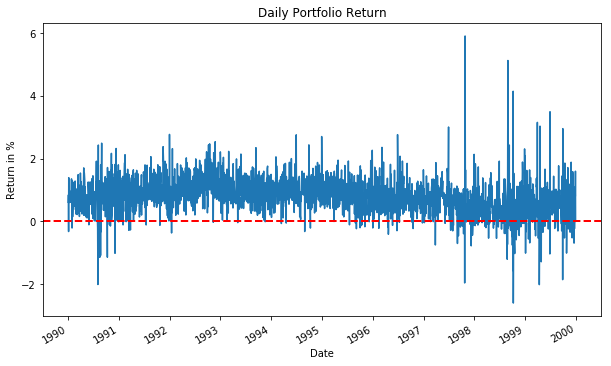

In [19]:
### Plotting the chart
(100*daily_pnl).plot(figsize=(10,6))
plt.title('Daily Portfolio Return')
plt.ylabel('Return in %')
plt.xlabel('Date')
plt.axhline(0, color='r', linestyle='dashed', linewidth=2)
plt.savefig('PortfolioReturn.jpeg')
plt.show()


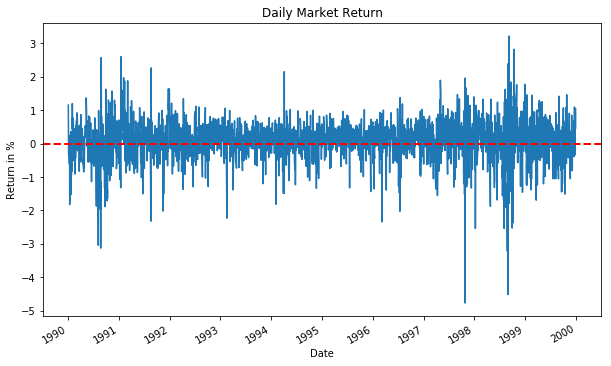

In [20]:
### Plotting market return
(100*Market_return).plot(figsize=(10,6))
plt.title('Daily Market Return')
plt.ylabel('Return in %')
plt.xlabel('Date')
plt.axhline(0, color='r', linestyle='dashed', linewidth=2)
plt.savefig('Market_Return.jpeg')
plt.show()

In [21]:
### Function for finding statistics 
### Input Series of return
def statistics(data, label):
    ann_return = data.mean()*252*100
    ann_vol = data.std()*math.sqrt(252)*100
    print(label + ' annualized Return is {:0.2f}%'.format(ann_return))
    print(label + ' annualized Volatility is {:0.2f}%'.format(ann_vol))
    print(label + ' sharpe Ratio is {:0.2f}'.format(ann_return/ann_vol))
    return

In [22]:
### Finding portfolio performance
statistics(daily_pnl, 'Portfolio')

statistics(Market_return,'Market')

Portfolio annualized Return is 201.62%
Portfolio annualized Volatility is 9.41%
Portfolio sharpe Ratio is 21.43
Market annualized Return is 18.29%
Market annualized Volatility is 9.64%
Market sharpe Ratio is 1.90


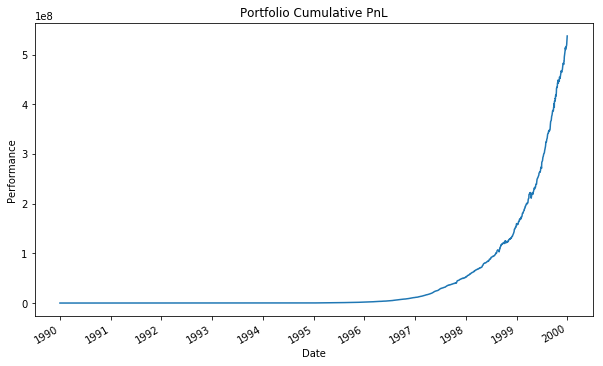

In [23]:
portfolio_index = (daily_pnl +1).cumprod()
portfolio_index.plot(figsize=(10,6))
plt.title('Portfolio Cumulative PnL')
plt.xlabel('Date')
plt.ylabel('Performance')
plt.savefig('Portfolio_PnL.jpeg')
plt.show()

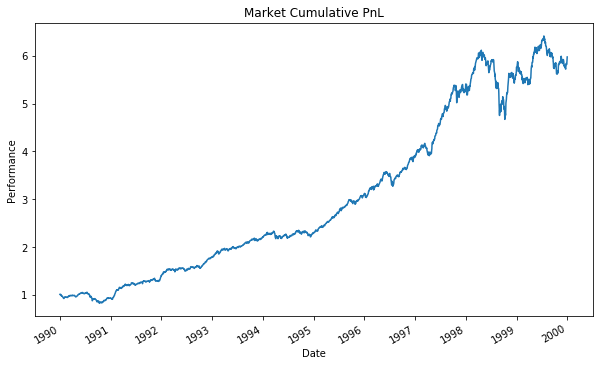

In [24]:
market_index = (Market_return +1).cumprod()
market_index.plot(figsize=(10,6))
plt.title('Market Cumulative PnL')
plt.xlabel('Date')
plt.ylabel('Performance')
plt.savefig('Market_PnL.jpeg')
plt.show()

In [25]:
#1c.According to the graph, they are quite consistent over time, but we can also check if they are stationary or not
from statsmodels.tsa.stattools import adfuller
result = adfuller(daily_pnl)
print('ADF Statistic for portfolio: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic for portfolio: -3.758783
p-value: 0.003358
Critical Values:
	10%: -2.567
	1%: -3.433
	5%: -2.863


In [26]:
#1c.According to the graph, they are quite consistent over time, but we can also check if they are stationary or not
from statsmodels.tsa.stattools import adfuller
result = adfuller(Market_return)
print('ADF Statistic for portfolio: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic for portfolio: -10.220757
p-value: 0.000000
Critical Values:
	10%: -2.567
	1%: -3.433
	5%: -2.863


Top 10 dates with highest total return 
TradeDate
1997-10-27    0.059052
1998-08-31    0.051241
1998-10-08    0.041442
1999-06-30    0.034912
1999-03-31    0.031526
1999-04-19    0.030327
1997-06-30    0.030047
1999-09-30    0.029537
1997-10-28    0.029262
1991-12-31    0.027693
dtype: float64
Bottom 10 dates with lowest total return 
TradeDate
1998-10-09   -0.026038
1999-04-14   -0.020184
1990-08-03   -0.020130
1997-10-24   -0.019641
1999-09-29   -0.018591
1998-10-07   -0.015705
1999-04-15   -0.015536
1990-08-02   -0.015357
1999-04-28   -0.012885
1998-08-26   -0.012086
dtype: float64


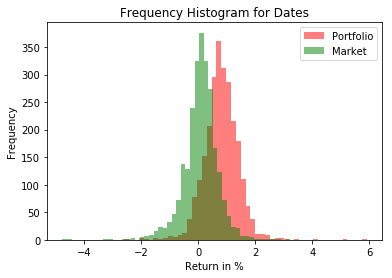

In [27]:
### Locating outliers in data wrt to dates
print('Top 10 dates with highest total return ')
print((final_return*weight).sum(axis=1).sort_values(ascending=False)[:10])

print('Bottom 10 dates with lowest total return ')
print((final_return*weight).sum(axis=1).sort_values(ascending=True)[:10])

kwargs = dict(alpha=0.5, bins=50)
plt.hist((final_return*weight*100).sum(axis=1).sort_values(ascending=True), **kwargs, color='r', label='Portfolio')
plt.hist(Market_return*100, **kwargs, color='g', label='Market')
plt.gca().set(title='Frequency Histogram for Dates', ylabel='Frequency', xlabel = 'Return in %')
plt.legend()
plt.savefig('Hist_dates.jpeg')
plt.show()

Top 10 ids with highest total return 
id
66545    0.340007
55336    0.337361
15580    0.328107
81700    0.318503
14286    0.318272
74908    0.309038
15457    0.284831
81614    0.277827
62763    0.277678
76532    0.273003
dtype: float64
Bottom 10 ids with lowest total return 
id
58464   -0.031895
30648   -0.026844
53196   -0.025973
57437   -0.024113
56741   -0.023781
51721   -0.021540
40694   -0.021109
47248   -0.020037
45241   -0.020023
12650   -0.019805
dtype: float64


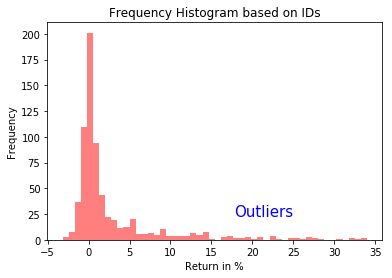

In [28]:
### Locating outliers in data wrt to security ids
print('Top 10 ids with highest total return ')
print((final_return*weight).sum(axis=0).sort_values(ascending=False)[:10])

print('Bottom 10 ids with lowest total return ')
print((final_return*weight).sum(axis=0).sort_values(ascending=True)[:10])

kwargs = dict(alpha=0.5, linewidth=0.2, bins=50)
plt.hist((final_return*weight*100).sum(axis=0).sort_values(ascending=True), **kwargs, color='r', label='Portfolio')
#plt.hist(Market_return*100, **kwargs, color='g', label='Market')
plt.gca().set(title='Frequency Histogram based on IDs', ylabel='Frequency', xlabel='Return in %')
plt.annotate('Outliers', ha = 'right', va = 'bottom', xy=(25,20), color='b', fontsize=15)
#plt.legend()
plt.savefig('Hist_Ids.jpeg')
plt.show()

Number of unique id included in portfolios is 525


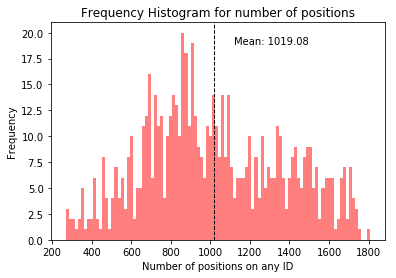

In [107]:
### Finding number of times each ID got included in portfolio
position_num = positions.applymap(lambda x: abs(x)).sum(axis=0).sort_values(ascending=False)

print('Number of unique id included in portfolios is ' + str(len(position_num.unique())))
kwargs = dict(alpha=0.5, linewidth=0.2, bins=100)
plt.hist(position_num, **kwargs, color='r')
plt.gca().set(title='Frequency Histogram for number of positions', ylabel='Frequency')
plt.xlabel('Number of positions on any ID')
plt.axvline(position_num.mean(), color='k', linestyle='dashed', linewidth=1)
#plt.axvline(position_num.quantile(0.9), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(position_num.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(position_num.mean()))
#plt.text(position_num.quantile(0.9)*0.9, max_ylim*0.7, '90 Percentile: {:.2f}'.format(position_num.mean()))
plt.savefig('Hist_Position.png')
plt.show()

In [30]:
wide_data.shape

(2528, 690)

In [31]:
### Calculating correlation between market and portfolio_index
Market_return.corr(daily_pnl)

-0.1194441032613969

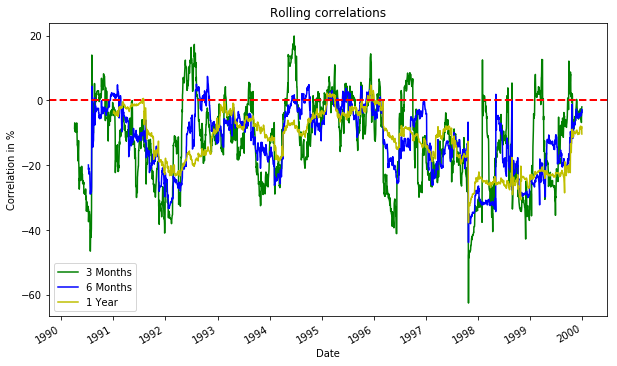

In [32]:
### Plotting a rolling correlation plot
(100*daily_pnl.rolling(66).corr(Market_return)).plot(figsize=(10,6), color='g', label='3 Months')
(100*daily_pnl.rolling(132).corr(Market_return)).plot(figsize=(10,6), color='b', label='6 Months')
(100*daily_pnl.rolling(254).corr(Market_return)).plot(figsize=(10,6), color='y', label='1 Year')

plt.xlabel('Date')
plt.ylabel('Correlation in %')
plt.axhline(0, color='r', linestyle='dashed', linewidth=2)
plt.title('Rolling correlations')
plt.legend()
plt.savefig('RollingCorrelation.png')
plt.show()

In [33]:
### Finding long portolios. 
long_weight = weight.copy().applymap(lambda x: 0 if x < 0 else x)
long_pnl = (final_return*long_weight).sum(axis=1)

In [34]:
### Finding short portolios. 
short_weight = weight.copy().applymap(lambda x: 0 if x > 0 else x)
short_pnl = (final_return*short_weight).sum(axis=1)

Historical correlation between Long and Short Portfolio is -0.6857423809696492


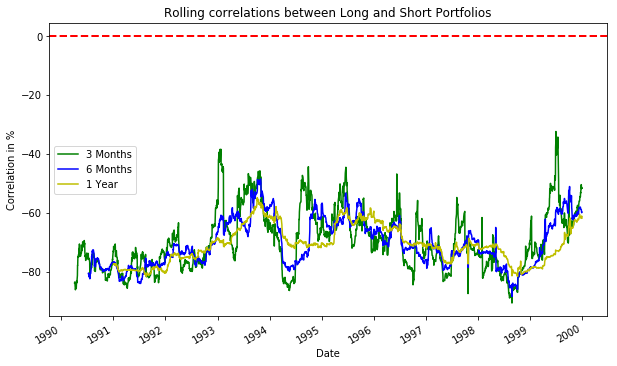

In [35]:
### Calculating correlation between market and portfolio_index
print('Historical correlation between Long and Short Portfolio is ' + str(long_pnl.corr(short_pnl)))

### Plotting a rolling correlation plot
(100*long_pnl.rolling(66).corr(short_pnl)).plot(figsize=(10,6), color='g', label='3 Months')
(100*long_pnl.rolling(132).corr(short_pnl)).plot(figsize=(10,6), color='b', label='6 Months')
(100*long_pnl.rolling(254).corr(short_pnl)).plot(figsize=(10,6), color='y', label='1 Year')

plt.xlabel('Date')
plt.ylabel('Correlation in %')
plt.axhline(0, color='r', linestyle='dashed', linewidth=2)
plt.title('Rolling correlations between Long and Short Portfolios')
plt.legend()
plt.savefig('LSRollingCorrelation.png')
plt.show()

## Simulating strategy for different lags

In [36]:
### Defining function for simulating strategy for different lag. 
def lag_simulation(return_mat, weight_mat, lag=1):
    lag_return = return_mat.copy().shift(periods=-lag)
    lag_daily_pnl = (lag_return*weight_mat).sum(axis=1)
    statistics(lag_daily_pnl, str('Porftolio with lag ' +str(lag)))
    return lag_daily_pnl


In [ ]:
lag_1 = lag_simulation(wide_data, weight, 1)

In [ ]:
lag_2 = lag_simulation(wide_data, weight, 2)

In [ ]:
lag_3 = lag_simulation(wide_data, weight, 3)

In [ ]:
lag_4 = lag_simulation(wide_data, weight, 4)

In [ ]:
lag_5 = lag_simulation(wide_data, weight, 5)

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(5,1,1)
ax2 = fig.add_subplot(5,1,2)
ax3 = fig.add_subplot(5,1,3)
ax4 = fig.add_subplot(5,1,4)
ax5 = fig.add_subplot(5,1,5)

fig.tight_layout(pad=0.1)

(100*lag_1).plot(figsize=(15,6), kind='line', color='b', ax=ax1)
ax1.set_title('Daily Return for Lag 1')
ax1.get_xaxis().set_visible(False)
ax1.set_ylabel('Return in %')

(100*lag_2).plot(figsize=(15,6), kind='line', color='r', ax=ax2)
ax2.set_title('Daily Return for Lag 2')
ax2.get_xaxis().set_visible(False)
ax2.set_ylabel('Return in %')

(100*lag_3).plot(figsize=(15,6), kind='line', color='pink', ax=ax3)
ax3.set_title('Daily Return for Lag 3')
#ax3.set_xlabel('Date')
ax3.get_xaxis().set_visible(False)
ax3.set_ylabel('Return in %')

(100*lag_4).plot(figsize=(15,6), kind='line', color='orange', ax=ax4)
ax4.set_title('Daily Return for Lag 4')
ax4.get_xaxis().set_visible(False)
ax4.set_ylabel('Return in %')

(100*lag_5).plot(figsize=(15,6), kind='line', color='green', ax=ax5)
ax5.set_title('Daily Return for Lag 5')
ax5.set_xlabel('Date')
ax5.set_ylabel('Return in %')

plt.savefig('Lag_Returns.jpeg',bbox_inches='tight')
plt.show()

In [38]:
### Creating a mapping of different dates
date_map = long_data[['TradeDate','d']].drop_duplicates()
date_map.head()
date_map.shape

(2528, 2)

In [39]:
### Replacing TradeDate with Date in weight matrix
weight = weight.merge(date_map, left_on='TradeDate', right_on='TradeDate')
weight.drop(['TradeDate'], axis=1, inplace=True)
weight.head()

,10137,10225,10401,10488,10516,10656,10866,10890,11308,11404,...,81614,81700,81702,82107,83030,83396,83433,83601,84129,d
0,0.000000,0.000000,0.000000,0.000000,0.007246,0.000000,0.000000,-0.007246,0.000000,0.000000,...,0.000000,0.007246,-0.007246,0.007246,0.000000,0.000000,-0.007246,0.007246,0.000000,1990-01-02 00:00:00
1,0.000000,0.000000,0.000000,0.007246,0.000000,0.007246,-0.007246,0.007246,0.007246,0.007246,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.007246,0.007246,0.000000,-0.007246,1990-01-03 00:00:00
2,0.000000,0.007246,0.000000,-0.007194,0.000000,-0.007194,0.007246,-0.007194,0.000000,0.007246,...,0.007246,-0.007194,-0.007194,-0.007194,-0.007194,0.000000,0.000000,0.000000,0.000000,1990-01-04 00:00:00
3,0.000000,0.000000,0.007353,0.007353,0.007353,0.007353,0.000000,-0.007246,0.000000,0.000000,...,0.007353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.007246,1990-01-05 00:00:00
4,0.007246,0.007246,-0.007246,-0.007246,0.000000,-0.007246,0.000000,0.007246,-0.007246,0.007246,...,0.000000,0.007246,0.000000,0.000000,0.000000,0.000000,0.007246,0.000000,0.007246,1990-01-08 00:00:00


In [67]:
### Creating data frame for each weight matrix
weight_1 = pd.melt(weight.shift(periods=+1).copy(), var_name = 'id', id_vars='d', value_name='w')
weight_1['k'] = 1
weight_2 = pd.melt(weight.shift(periods=+2).copy(), var_name = 'id', id_vars='d', value_name='w')
weight_2['k'] = 2
weight_3 = pd.melt(weight.shift(periods=+3).copy(), var_name = 'id', id_vars='d', value_name='w')
weight_3['k'] = 3
weight_4 = pd.melt(weight.shift(periods=+4).copy(), var_name = 'id', id_vars='d', value_name='w')
weight_4['k'] = 4
weight_5 = pd.melt(weight.shift(periods=+5).copy(), var_name = 'id', id_vars='d', value_name='w')
weight_5['k'] = 5

In [68]:
### Combining all the data weight
master_weight = pd.concat([weight_1, weight_2, weight_3, weight_4, weight_5],axis=0)
master_weight.shape

(8721600, 4)

In [69]:
master_weight['vid'] =0
master_weight['pid'] = 926773554

In [70]:
master_weight.head(10)

,d,id,w,k,vid,pid
0,NaN,10137,NaN,1,0,926773554
1,1990-01-02 00:00:00,10137,0.000000,1,0,926773554
2,1990-01-03 00:00:00,10137,0.000000,1,0,926773554
3,1990-01-04 00:00:00,10137,0.000000,1,0,926773554
4,1990-01-05 00:00:00,10137,0.000000,1,0,926773554
5,1990-01-08 00:00:00,10137,0.007246,1,0,926773554
6,1990-01-09 00:00:00,10137,0.000000,1,0,926773554
7,1990-01-10 00:00:00,10137,0.000000,1,0,926773554
8,1990-01-11 00:00:00,10137,0.000000,1,0,926773554
9,1990-01-12 00:00:00,10137,0.000000,1,0,926773554


In [49]:
master_weight.describe()

,w,k,vid,pid
count,8.723890e+06,8.734240e+06,8734240.0,8734240.0
mean,1.830679e+00,3.000000e+00,0.0,926773554.0
std,5.550984e+01,1.414214e+00,0.0,0.0
min,-7.246377e-03,1.000000e+00,0.0,926773554.0
25%,0.000000e+00,2.000000e+00,0.0,926773554.0
50%,0.000000e+00,3.000000e+00,0.0,926773554.0
75%,0.000000e+00,4.000000e+00,0.0,926773554.0
max,2.527000e+03,5.000000e+00,0.0,926773554.0


In [71]:
master_weight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8721600 entries, 0 to 1744319
Data columns (total 6 columns):
d      object
id     object
w      float64
k      int64
vid    int64
pid    int64
dtypes: float64(1), int64(3), object(2)
memory usage: 465.8+ MB


In [72]:
master_weight.dropna(axis=0, how='any', inplace=True)
print(master_weight.shape)

(8711250, 6)


In [73]:
master_weight.drop_duplicates(inplace=True)
print(master_weight.shape)

(8711250, 6)


In [74]:
master_weight = master_weight[['pid','d','id','k','w','vid']]
master_weight.head()

,pid,d,id,k,w,vid
1,926773554,1990-01-02 00:00:00,10137,1,0.000000,0
2,926773554,1990-01-03 00:00:00,10137,1,0.000000,0
3,926773554,1990-01-04 00:00:00,10137,1,0.000000,0
4,926773554,1990-01-05 00:00:00,10137,1,0.000000,0
5,926773554,1990-01-08 00:00:00,10137,1,0.007246,0


In [75]:
### Exporting data from python
#master_weight.to_csv('sql_table_to_upload.txt', header=True, index=False)

In [136]:
### Simulating different version of strategy
### Dividing each row into quantiles
signal_dec = signal.copy().apply(lambda row: pd.qcut(row, 20, labels=False, duplicates = 'drop') , axis=1)
signal_dec.head()

id,10137,10225,10401,10488,10516,10656,10866,10890,11308,11404,...,81294,81614,81700,81702,82107,83030,83396,83433,83601,84129
TradeDate,,,,,,,,,,,,,,,,,,,,,
1990-01-02,12,6,5,12,14,7,4,0,9,11,...,10,8,17,3,14,8,12,3,14,9
1990-01-03,10,8,11,16,8,16,0,15,13,14,...,8,4,8,6,8,4,0,15,5,3
1990-01-04,6,14,12,0,8,0,13,3,8,13,...,2,14,2,1,3,2,12,5,5,5
1990-01-05,8,6,12,15,15,15,6,1,8,8,...,4,14,4,7,4,10,11,4,4,1
1990-01-08,13,15,1,0,4,0,5,16,2,14,...,11,8,16,11,8,8,5,14,8,14


In [137]:
positions_dec = signal_dec.copy().apply(lambda row: positioning(row), axis=1)
positions_dec.head()

id,10137,10225,10401,10488,10516,10656,10866,10890,11308,11404,...,81294,81614,81700,81702,82107,83030,83396,83433,83601,84129
TradeDate,,,,,,,,,,,,,,,,,,,,,
1990-01-02,0,0,0,0,0,0,0,-1,0,0,...,0,0,1,0,0,0,0,0,0,0
1990-01-03,0,0,0,1,0,1,-1,0,0,0,...,0,0,0,0,0,0,-1,0,0,0
1990-01-04,0,0,0,-1,0,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1990-01-05,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1990-01-08,0,0,0,-1,0,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [138]:
weight_dec = positions_dec.copy().apply(lambda row: weighting(row), axis=1)
weight_dec.head()

id,10137,10225,10401,10488,10516,10656,10866,10890,11308,11404,...,81294,81614,81700,81702,82107,83030,83396,83433,83601,84129
TradeDate,,,,,,,,,,,,,,,,,,,,,
1990-01-02,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,-0.028571,0.0,0.0,...,0.0,0.0,0.028571,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1990-01-03,0.0,0.0,0.0,0.028571,0.000000,0.028571,-0.027027,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,-0.027027,0.0,0.0,0.0
1990-01-04,0.0,0.0,0.0,-0.028571,0.000000,-0.028571,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1990-01-05,0.0,0.0,0.0,0.028571,0.028571,0.028571,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1990-01-08,0.0,0.0,0.0,-0.027778,0.000000,-0.027778,0.000000,0.028571,0.0,0.0,...,0.0,0.0,0.028571,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [139]:
dec_1 = lag_simulation(wide_data, weight_dec, 1)

Porftolio with lag 1 annualized Return is 574.62%
Porftolio with lag 1 annualized Volatility is 23.14%
Porftolio with lag 1 sharpe Ratio is 24.83


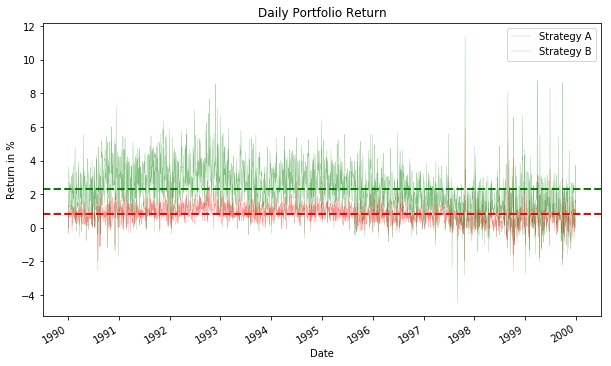

In [140]:
### Plotting the chart
kwargs = dict(alpha=0.5, linewidth=0.3)
(100*daily_pnl).plot(figsize=(10,6), **kwargs, color='r', label='Strategy A')
(100*dec_1).plot(figsize=(10,6), color='g',**kwargs, label='Strategy B')
plt.title('Daily Portfolio Return')
plt.ylabel('Return in %')
plt.xlabel('Date')
plt.axhline((100*daily_pnl).mean(), color='r', linestyle='dashed', linewidth=2)
plt.axhline((100*dec_1).mean(), color='g', linestyle='dashed', linewidth=2)
plt.legend()
plt.savefig('PortfolioReturn_comp.jpeg')
plt.show()


In [141]:
#1c.According to the graph, they are quite consistent over time, but we can also check if they are stationary or not
from statsmodels.tsa.stattools import adfuller
result = adfuller(dec_1)
print('ADF Statistic for portfolio: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic for portfolio: -3.200492
p-value: 0.019956
Critical Values:
	10%: -2.567
	1%: -3.433
	5%: -2.863


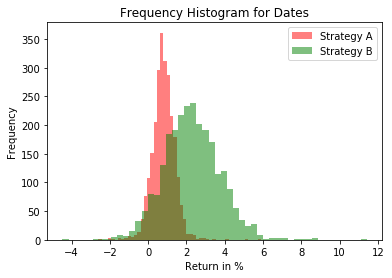

In [142]:
### Locating outliers in data wrt to dates

kwargs = dict(alpha=0.5, bins=50)
plt.hist(daily_pnl*100, **kwargs, color='r', label='Strategy A')
plt.hist(dec_1*100, **kwargs, color='g', label='Strategy B')
plt.gca().set(title='Frequency Histogram for Dates', ylabel='Frequency', xlabel = 'Return in %')
plt.legend()
plt.savefig('Hist_comp.jpeg')
plt.show()

In [147]:
Market_return.corr(dec_1)

-0.08260278676412038

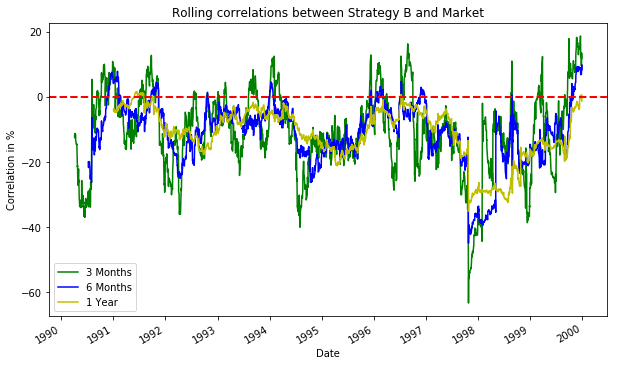

In [143]:
### Plotting a rolling correlation plot
(100*dec_1.rolling(66).corr(Market_return)).plot(figsize=(10,6), color='g', label='3 Months')
(100*dec_1.rolling(132).corr(Market_return)).plot(figsize=(10,6), color='b', label='6 Months')
(100*dec_1.rolling(254).corr(Market_return)).plot(figsize=(10,6), color='y', label='1 Year')

plt.xlabel('Date')
plt.ylabel('Correlation in %')
plt.axhline(0, color='r', linestyle='dashed', linewidth=2)
plt.title('Rolling correlations between Strategy B and Market')
plt.legend()
plt.savefig('DecileRolling.png')
plt.show()

In [144]:
### Finding long portolios. 
long_dec_weight = weight_dec.copy().applymap(lambda x: 0 if x < 0 else x)
long_dec_pnl = (final_return*long_dec_weight).sum(axis=1)


short_dec_weight = weight_dec.copy().applymap(lambda x: 0 if x > 0 else x)
short_dec_pnl = (final_return*short_dec_weight).sum(axis=1)

Historical correlation between Long and Short Portfolio is -0.23197646999744448


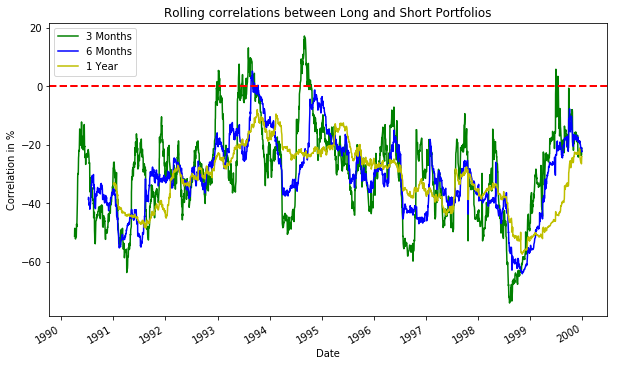

In [145]:
### Calculating correlation between market and portfolio_index
print('Historical correlation between Long and Short Portfolio is ' + str(long_dec_pnl.corr(short_dec_pnl)))

### Plotting a rolling correlation plot
(100*long_dec_pnl.rolling(66).corr(short_dec_pnl)).plot(figsize=(10,6), color='g', label='3 Months')
(100*long_dec_pnl.rolling(132).corr(short_dec_pnl)).plot(figsize=(10,6), color='b', label='6 Months')
(100*long_dec_pnl.rolling(254).corr(short_dec_pnl)).plot(figsize=(10,6), color='y', label='1 Year')

plt.xlabel('Date')
plt.ylabel('Correlation in %')
plt.axhline(0, color='r', linestyle='dashed', linewidth=2)
plt.title('Rolling correlations between Long and Short Portfolios')
plt.legend()
plt.savefig('LSRollingCorrelation_dec.png')
plt.show()

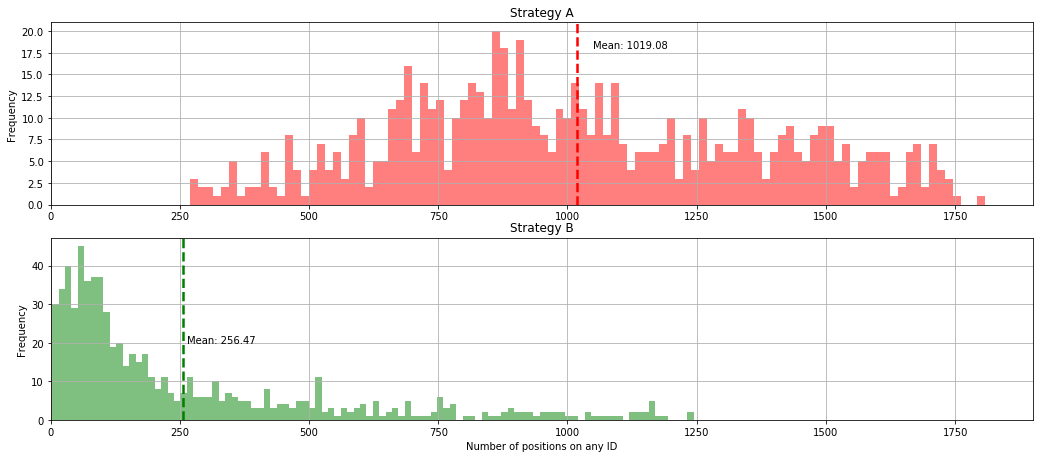

In [146]:
### Finding number of times each ID got included in portfolio
position_num = positions.applymap(lambda x: abs(x)).sum(axis=0).sort_values(ascending=False)
position_dec_num = positions_dec.applymap(lambda x: abs(x)).sum(axis=0).sort_values(ascending=False)

fig = plt.figure()
kwargs = dict(alpha=0.5, linewidth=0.2, bins=100)

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

fig.tight_layout(pad=0.1)
#fig.suptitle('Positions Comparison', fontsize=16)

position_num.hist(figsize=(15,6), **kwargs, color='r', ax=ax1, label='Quantile Strategy')
ax1.set_xlim(0,1900)
ax1.axvline(position_num.mean(), color='r', linestyle='dashed', linewidth=2.5)
ax1.text(position_num.mean()*1.03, 18, 'Mean: {:.2f}'.format(position_num.mean()))
ax1.set_ylabel('Frequency')
ax1.set_title('Strategy A')

position_dec_num.hist(figsize=(15,6), **kwargs, color='g', ax=ax2, label='Decile Strategy')
ax2.axvline(position_dec_num.mean(), color='g', linestyle='dashed', linewidth=2.5)
ax2.text(position_dec_num.mean()*1.03, 20, 'Mean: {:.2f}'.format(position_dec_num.mean()))
ax2.set_xlabel('Number of positions on any ID')
ax2.set_xlim(0,1900)
ax2.set_ylabel('Frequency')
#plt.legend()
ax2.set_title('Strategy B')
plt.savefig('Positions_comparison.jpeg',bbox_inches='tight')
plt.show()

In [100]:
position_dec_num

id
76532    1504
18148    1495
81614    1492
74908    1482
14227    1471
72128    1456
76946    1455
81700    1448
40970    1438
15457    1430
74500    1427
60581    1416
66545    1407
31078    1406
76807    1400
58473    1392
15580    1378
55862    1377
51933    1375
32897    1371
68145    1363
59871    1352
46229    1349
14286    1343
73796    1341
30761    1317
64442    1315
57251    1313
62500    1305
63781    1292
         ... 
11404      77
22947      74
24563      74
22859      73
58819      73
37161      69
23712      68
26606      68
24221      67
22517      65
27959      63
23536      63
10137      62
38762      59
25443      58
24248      57
24205      53
11674      52
24432      52
53663      51
21928      50
23114      50
24440      48
24109      41
23085      40
23931      39
41187      39
25099      32
22437      32
24985      24
Length: 690, dtype: int64